In [1]:
import matplotlib.pyplot as plt
import numpy as np
size_plot = 24 * 1.5

from utils import *

In [2]:
density_values, intgral_list, system_matrix_size = get_density_list()

CPU_quadrule = load_cpu_stats_from_files_multi("CPUMultiThread", density_values, "quadrule.txt")
CPU_momintegrals = load_cpu_stats_from_files_multi("CPUMultiThread", density_values, "momintegrals.txt")
CPU_median, CPU_min, CPU_max, CPU_std = load_cpu_stats_from_files("GPU", density_values, "should_calc_true.txt")
GPU_median, GPU_min, GPU_max, GPU_std = load_cpu_stats_from_files("GPU", density_values, "should_calc_false.txt")

C:\Users\Ian\AppData\Local\Temp\ipykernel_3532\3620080482.py:37: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


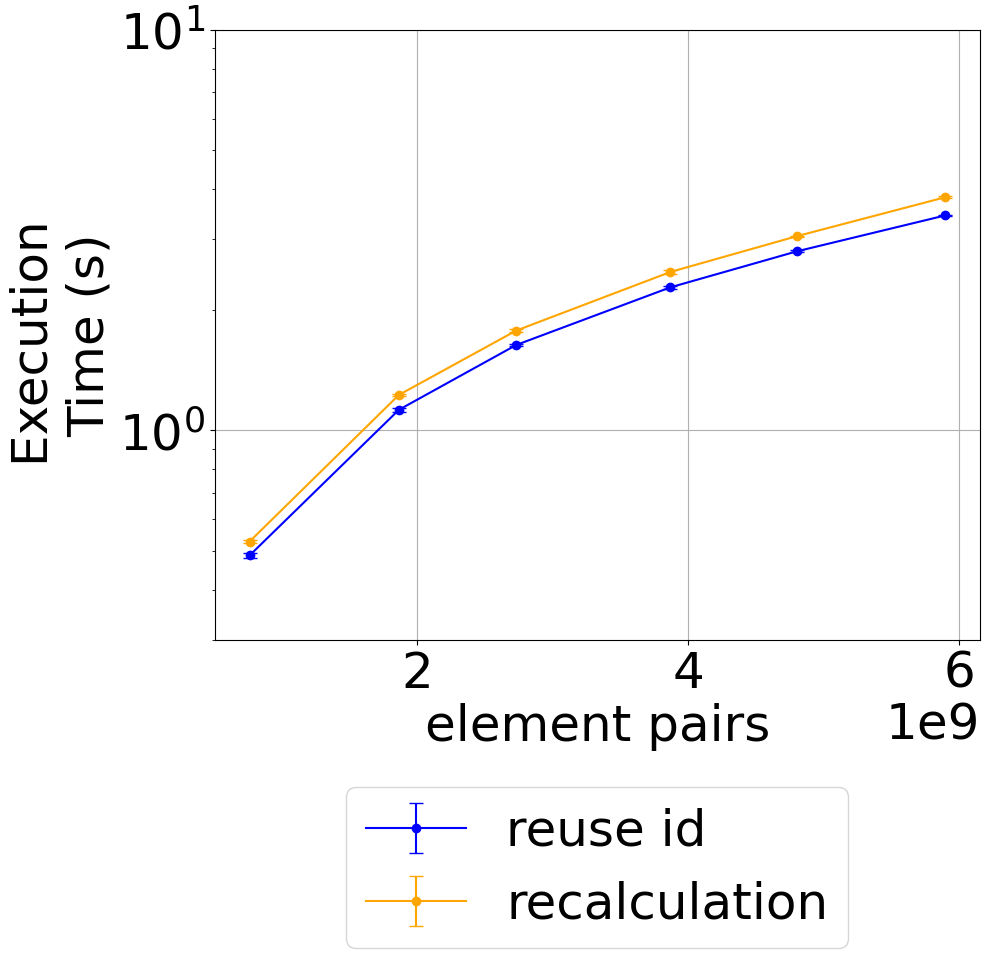

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot CPU with error bars
ax.errorbar(
    intgral_list, CPU_median, yerr=CPU_std,
    marker='o', label='reuse id', color='blue', capsize=5, linestyle='-'
)

# Plot GPU with error bars
ax.errorbar(
    intgral_list, GPU_median, yerr=GPU_std,
    marker='o', label='recalculation', color='orange', capsize=5, linestyle='-'
)

ax.set_xlabel('element pairs', fontsize=size_plot)
ax.set_ylabel('Execution \nTime (s)', fontsize=size_plot)
# ax.set_title('Execution Time vs threads', fontsize=size_plot)

ax.tick_params(axis='both', labelsize=size_plot)
ax.set_yscale('log')


fig.canvas.draw()
offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(size_plot)

# ax.legend(fontsize=size_plot)
ax.legend(
    fontsize=size_plot,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2),  # centered below axis
    ncol=1,                        # spread labels into columns
    frameon=True
)

ax.set_ylim( 3e-1, 1e1)
plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/should_calc_true_VS_false.svg", format='svg')
plt.show()

C:\Users\Ian\AppData\Local\Temp\ipykernel_3532\2594322198.py:46: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


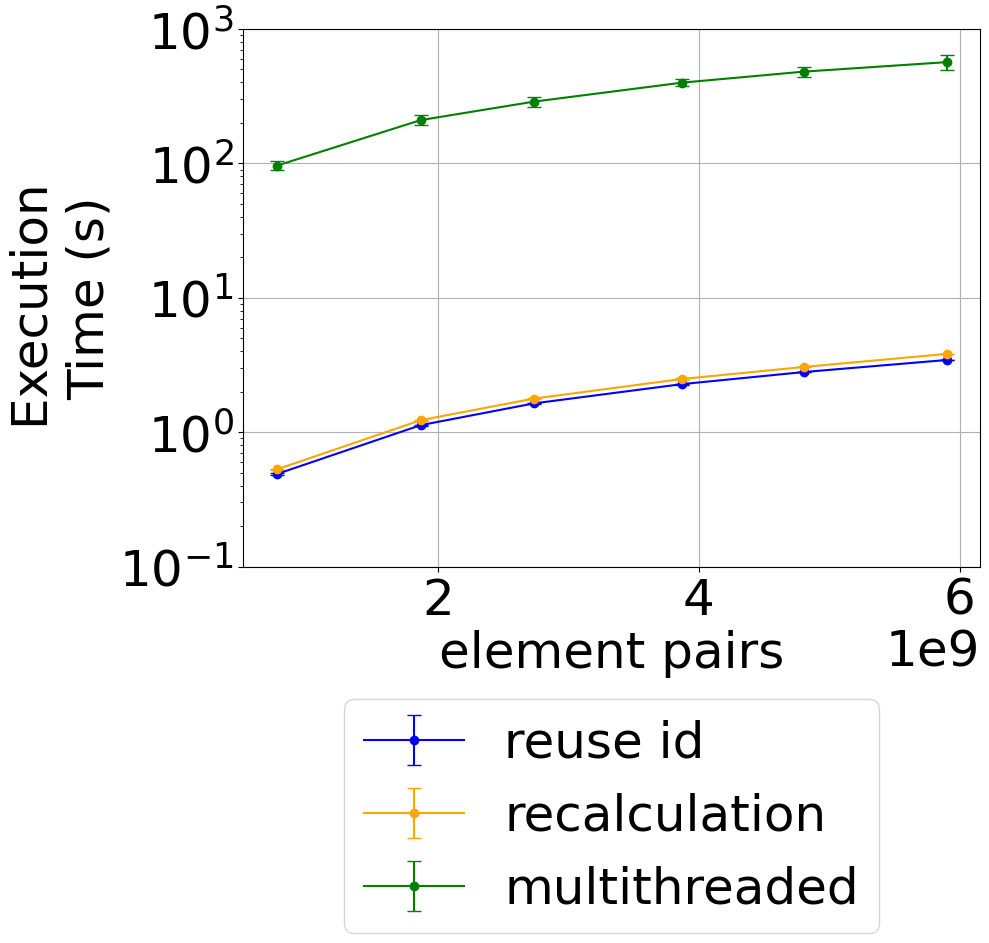

In [4]:
CPU_diff_median = np.array(CPU_momintegrals[0]) - np.array(CPU_quadrule[0])
CPU_diff_std = np.array(CPU_momintegrals[3]) - np.array(CPU_quadrule[3])

fig, ax = plt.subplots(figsize=(10, 10))

# Plot CPU with error bars
ax.errorbar(
    intgral_list, CPU_median, yerr=CPU_std,
    marker='o', label='reuse id', color='blue', capsize=5, linestyle='-'
)

# Plot GPU with error bars
ax.errorbar(
    intgral_list, GPU_median, yerr=GPU_std,
    marker='o', label='recalculation', color='orange', capsize=5, linestyle='-'
)

ax.errorbar(
    intgral_list, CPU_diff_median, yerr=CPU_diff_std,
    marker='o', label='multithreaded', color='green', capsize=5, linestyle='-'
)

ax.set_xlabel('element pairs', fontsize=size_plot)
ax.set_ylabel('Execution \nTime (s)', fontsize=size_plot)
# ax.set_title('Execution Time vs threads', fontsize=size_plot)

ax.tick_params(axis='both', labelsize=size_plot)
ax.set_yscale('log')


fig.canvas.draw()
offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(size_plot)

# ax.legend(fontsize=size_plot)
# ax.legend(fontsize=size_plot, loc='upper left', bbox_to_anchor=(0.0, 0.35))
ax.legend(
    fontsize=size_plot,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2),  # centered below axis
    ncol=1,                        # spread labels into columns
    frameon=True
)

ax.set_ylim( 1e-1, 1e3)
plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/should_calc_true_VS_false_and_CPU.svg", format='svg')
plt.show()

C:\Users\Ian\AppData\Local\Temp\ipykernel_3532\2004604971.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


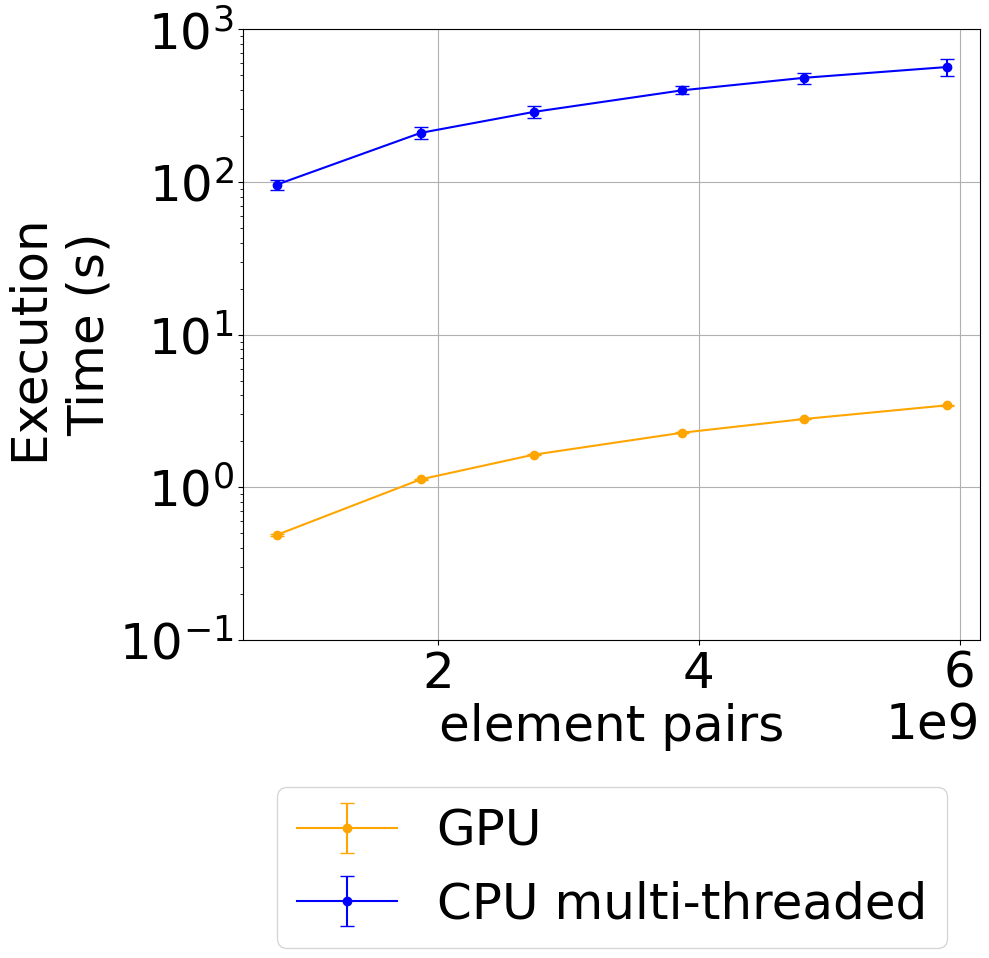

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot CPU with error bars
ax.errorbar(
    intgral_list, CPU_median, yerr=CPU_std,
    marker='o', label='GPU', color='orange', capsize=5, linestyle='-'
)

# Plot GPU with error bars
# ax.errorbar(
#     intgral_list, GPU_median, yerr=GPU_std,
#     marker='o', label='recalculation', color='orange', capsize=5, linestyle='-'
# )

ax.errorbar(
    intgral_list, CPU_diff_median, yerr=CPU_diff_std,
    marker='o', label='CPU multi-threaded', color='blue', capsize=5, linestyle='-'
)

ax.set_xlabel('element pairs', fontsize=size_plot)
ax.set_ylabel('Execution \nTime (s)', fontsize=size_plot)
# ax.set_title('Execution Time vs threads', fontsize=size_plot)

ax.tick_params(axis='both', labelsize=size_plot)
ax.set_yscale('log')


fig.canvas.draw()
offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(size_plot)

# ax.legend(fontsize=size_plot)
# ax.legend(fontsize=size_plot, loc='upper left', bbox_to_anchor=(0.0, 0.35))
ax.legend(
    fontsize=size_plot,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2),  # centered below axis
    ncol=1,                        # spread labels into columns
    frameon=True
)

ax.set_ylim( 1e-1, 1e3)
plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/should_calc_true_VS_false_and_CPU_for_EA.svg", format='svg')
plt.show()

In [6]:
def format_table_latex(intgral_list, CPU_median, CPU_std, GPU_median, GPU_std):
    print(r"\begin{table}[h]")
    print(r"\centering")
    print(r"\begin{tabular}{|c|c|c|c|}")
    print(r"\hline")
    print(r"\makecell{\textbf{Element Pairs}\\\textbf{(billions)}} &")
    print(r"\makecell{\textbf{CPU Time}\\\textbf{(Median $\pm$ Std) (s)}} &")
    print(r"\makecell{\textbf{GPU Time}\\\textbf{(Median $\pm$ Std) (s)}} &")
    print(r"\makecell{\textbf{GPU}\\\textbf{Speedup}} \\")
    print(r"\hline")

    for x, cpu_m, cpu_s, gpu_m, gpu_s in zip(intgral_list, CPU_median, CPU_std, GPU_median, GPU_std):
        slowdown = gpu_m / cpu_m
        # print(cpu_m, gpu_m, cpu_m / gpu_m)
        print(f"{x / 1e9:.3f} & "
              f"${cpu_m :.3f} \pm {cpu_s:.2f}$ & "
              f"${gpu_m:.3f} \pm {gpu_s:.2e}$ & "
              f"${slowdown:.3f}\\times$ \\\\")
    
    print(r"\hline")
    print(r"\end{tabular}")
    print(r"\caption{Comparison of median CPU and GPU execution times (with standard deviation) and resulting speedup.}")
    print(r"\label{tab:Median_Std_Speedup}")
    print(r"\end{table}")


<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Ian\AppData\Local\Temp\ipykernel_3532\3112916784.py:16: SyntaxWarning: invalid escape sequence '\p'
  f"${cpu_m :.3f} \pm {cpu_s:.2f}$ & "
C:\Users\Ian\AppData\Local\Temp\ipykernel_3532\3112916784.py:17: SyntaxWarning: invalid escape sequence '\p'
  f"${gpu_m:.3f} \pm {gpu_s:.2e}$ & "


In [7]:
format_table_latex(intgral_list, CPU_median, CPU_std, GPU_median, GPU_std)

\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
\makecell{\textbf{Element Pairs}\\\textbf{(billions)}} &
\makecell{\textbf{CPU Time}\\\textbf{(Median $\pm$ Std) (s)}} &
\makecell{\textbf{GPU Time}\\\textbf{(Median $\pm$ Std) (s)}} &
\makecell{\textbf{GPU}\\\textbf{Speedup}} \\
\hline
0.764 & $0.488 \pm 0.01$ & $0.528 \pm 3.49e-03$ & $1.083\times$ \\
1.866 & $1.126 \pm 0.01$ & $1.227 \pm 8.07e-03$ & $1.089\times$ \\
2.732 & $1.635 \pm 0.01$ & $1.776 \pm 1.19e-02$ & $1.086\times$ \\
3.870 & $2.277 \pm 0.02$ & $2.487 \pm 2.43e-02$ & $1.092\times$ \\
4.804 & $2.800 \pm 0.02$ & $3.055 \pm 7.82e-03$ & $1.091\times$ \\
5.898 & $3.441 \pm 0.01$ & $3.820 \pm 1.78e-02$ & $1.110\times$ \\
\hline
\end{tabular}
\caption{Comparison of median CPU and GPU execution times (with standard deviation) and resulting speedup.}
\label{tab:Median_Std_Speedup}
\end{table}
